<a href="https://colab.research.google.com/github/IboPMoro/Walmart_Forecast/blob/main/Prophet_Model_Wallmart_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 631 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive 
drive.mount('/content/drive', force_remount=True) 
from sklearn.model_selection import train_test_split
import itertools
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto Final/Walmart_Store_sales.csv')
pd.options.display.float_format = '{:,.2f}'.format 

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"1,643,690.90",0,42.31,2.57,211.10,8.11
1,1,12-02-2010,"1,641,957.44",1,38.51,2.55,211.24,8.11
2,1,19-02-2010,"1,611,968.17",0,39.93,2.51,211.29,8.11
3,1,26-02-2010,"1,409,727.59",0,46.63,2.56,211.32,8.11
4,1,05-03-2010,"1,554,806.68",0,46.50,2.62,211.35,8.11


In [ ]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True,yearfirst=False)

In [ ]:
data = df[['Date','Weekly_Sales']].copy()
data.dropna(inplace=True)
data.columns = ['ds','y']
data

,ds,y
0,2010-02-05,"1,643,690.90"
1,2010-02-12,"1,641,957.44"
2,2010-02-19,"1,611,968.17"
3,2010-02-26,"1,409,727.59"
4,2010-03-05,"1,554,806.68"
...,...,...
6430,2012-09-28,"713,173.95"
6431,2012-10-05,"733,455.07"
6432,2012-10-12,"734,464.36"
6433,2012-10-19,"718,125.53"


In [ ]:
data = data.groupby('ds')['y'].sum().reset_index()
data

,ds,y
0,2010-02-05,"49,750,740.50"
1,2010-02-12,"48,336,677.63"
2,2010-02-19,"48,276,993.78"
3,2010-02-26,"43,968,571.13"
4,2010-03-05,"46,871,470.30"
...,...,...
138,2012-09-28,"43,734,899.40"
139,2012-10-05,"47,566,639.31"
140,2012-10-12,"46,128,514.25"
141,2012-10-19,"45,122,410.57"


In [ ]:
size = 30
prophet_train = data[:-size]
prophet_test = data[-size:]

In [ ]:
prophet_train.tail()

,ds,y
108,2012-03-02,"46,861,034.97"
109,2012-03-09,"47,480,454.11"
110,2012-03-16,"46,901,504.94"
111,2012-03-23,"44,993,794.45"
112,2012-03-30,"45,272,862.02"


In [ ]:
prophet_test.head()

,ds,y
113,2012-04-06,"53,502,315.87"
114,2012-04-13,"46,629,261.41"
115,2012-04-20,"45,072,529.78"
116,2012-04-27,"43,716,798.89"
117,2012-05-04,"47,124,197.93"


In [ ]:
m = Prophet(changepoint_prior_scale=0.1)

In [ ]:
m.fit(prophet_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp643zkfgy/5ms0rrpx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp643zkfgy/979z239d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11533', 'data', 'file=/tmp/tmp643zkfgy/5ms0rrpx.json', 'init=/tmp/tmp643zkfgy/979z239d.json', 'output', 'file=/tmp/tmp643zkfgy/prophet_modeloyjtb9i1/prophet_model-20221214200858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:08:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:08:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=30, freq='W-FRI')

In [ ]:
future.tail()

,ds
138,2012-09-28
139,2012-10-05
140,2012-10-12
141,2012-10-19
142,2012-10-26


In [ ]:
forecast = m.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
138,2012-09-28,"44,034,653.30","39,206,203.45","49,057,551.40"
139,2012-10-05,"45,556,225.48","40,418,211.72","50,445,918.43"
140,2012-10-12,"46,071,913.34","41,293,021.11","51,100,499.04"
141,2012-10-19,"45,334,000.73","40,488,632.69","49,976,137.68"
142,2012-10-26,"44,979,307.65","40,428,058.52","49,862,148.68"


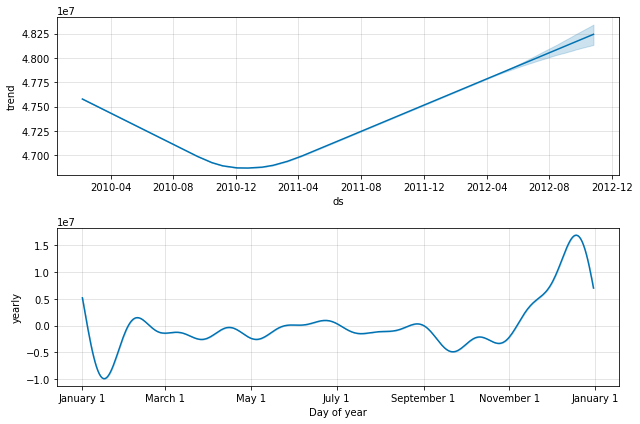

In [ ]:
fig = m.plot_components(forecast)

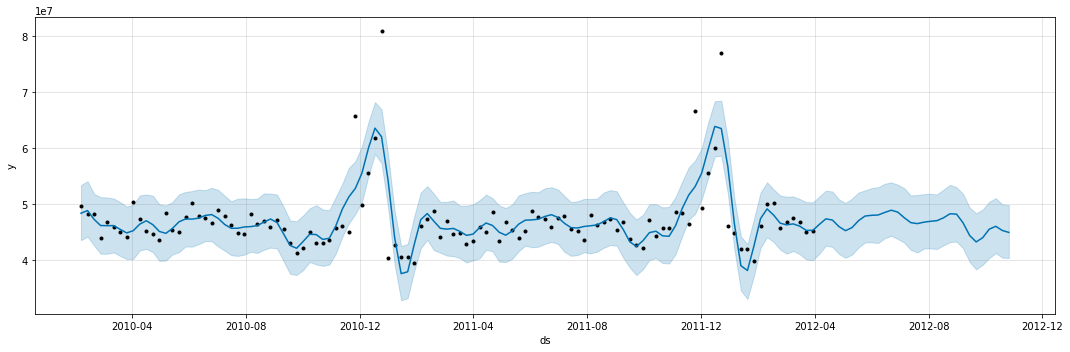

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = m.plot(forecast,ax=ax)
plt.show()

In [ ]:
prophet_test_forecast = m.predict(prophet_test)
prophet_test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
25,2012-09-28,"44,034,653.30","39,406,401.47","49,290,763.73"
26,2012-10-05,"45,556,225.48","40,765,130.03","50,805,757.99"
27,2012-10-12,"46,071,913.34","41,501,281.80","51,065,951.70"
28,2012-10-19,"45,334,000.73","40,418,001.00","50,017,353.40"
29,2012-10-26,"44,979,307.65","40,065,328.63","49,620,185.79"


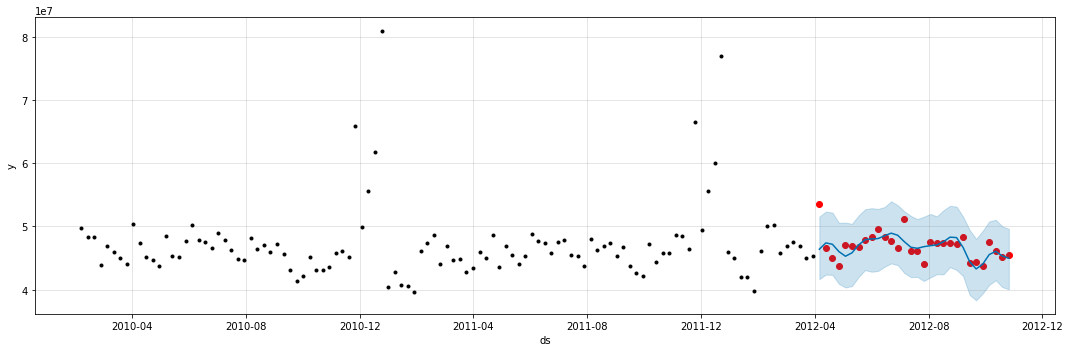

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(prophet_test.ds, prophet_test['y'], color='r')
fig = m.plot(prophet_test_forecast, ax=ax)

In [ ]:
print(f'There are {len(m.changepoints)} change points. \nThe change points dates are \n{data.loc[data["ds"].isin(m.changepoints)]}')

There are 25 change points. 
The change points dates are 
           ds             y
4  2010-03-05 46,871,470.30
7  2010-03-26 44,133,961.05
11 2010-04-23 44,734,452.56
14 2010-05-14 45,330,080.20
18 2010-06-11 47,826,546.72
21 2010-07-02 48,917,484.50
25 2010-07-30 44,630,363.42
28 2010-08-20 47,060,952.92
32 2010-09-17 43,080,726.51
36 2010-10-15 43,149,473.45
39 2010-11-05 45,781,981.89
43 2010-12-03 49,909,027.88
46 2010-12-24 80,931,415.60
50 2011-01-21 40,654,648.03
53 2011-02-11 47,336,192.79
57 2011-03-11 44,627,319.40
61 2011-04-08 45,887,466.80
64 2011-04-29 43,530,032.78
68 2011-05-27 45,293,457.04
71 2011-06-17 47,447,561.77
75 2011-07-15 45,515,929.92
78 2011-08-05 48,015,466.97
82 2011-09-02 45,376,623.27
85 2011-09-23 42,718,096.73
89 2011-10-21 45,818,953.44


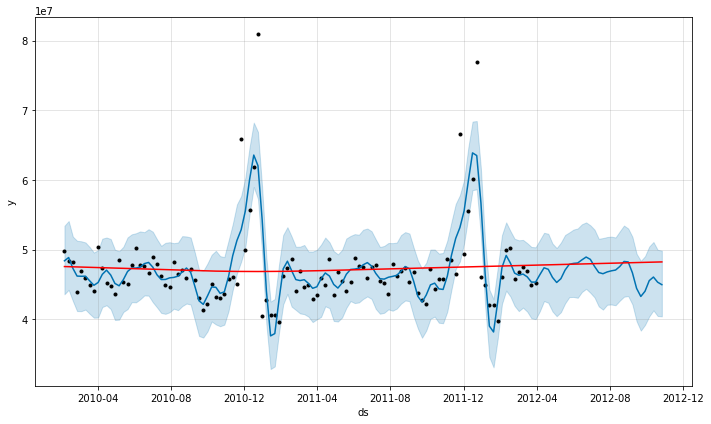

In [ ]:
fig = m.plot(forecast) 
a = add_changepoints_to_plot(fig.gca(), m, forecast)

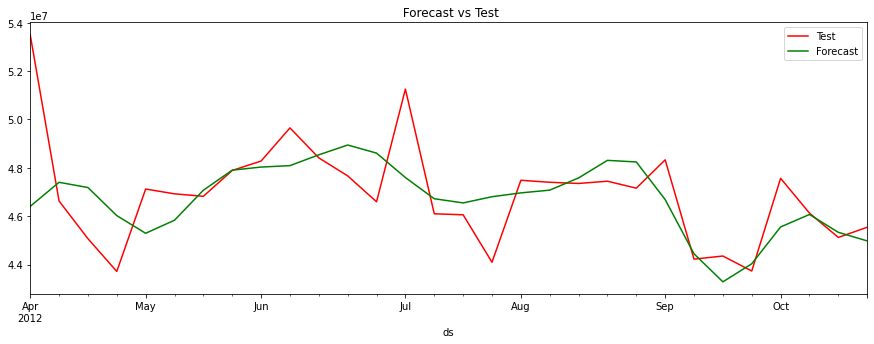

In [ ]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
prophet_test.plot(kind='line',x='ds', y='y', color='red', label='Test', ax=ax)
prophet_test_forecast.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title(' Forecast vs Test')
plt.show()

METRICAS: 
MAPE
MAE
MSE

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
MAPE = mean_absolute_percentage_error(prophet_test['y'],prophet_test_forecast['yhat'])
MAPE

0.025896217979804605

In [ ]:
MAE = mean_absolute_error(prophet_test['y'],prophet_test_forecast['yhat'])
MAE

1242278.2845182868

In [ ]:
MSE = mean_squared_error(prophet_test['y'],prophet_test_forecast['yhat'])
MSE

3519542589609.167